In [2]:
import pandas as pd

In [3]:
path = 'cbp-landsat-matchup.csv'
df = pd.read_csv(path)
df.columns = df.columns.str.strip()
df.head()

,Unnamed: 0,EventId,Station,SampleDate,SampleTime,Depth,SampleType,SampleReplicateType,Parameter,Qualifier,...,coastal_n,blue_n,green_n,red_n,nir08_n,datetime,eo:cloud_cover,proj:epsg,view:sun_azimuth,view:sun_elevation
0,2,394409,LE5.1,2013-10-01,10:00:00,1,D,S1,CHLA,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.5,32618,153.472907,46.995058
1,541,394409,LE5.1,2013-10-01,10:00:00,1,D,S1,DIN,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.5,32618,153.472907,46.995058
2,1098,394409,LE5.1,2013-10-01,10:00:00,1,ISM,M1,DO,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.5,32618,153.472907,46.995058
3,1802,394409,LE5.1,2013-10-01,10:00:00,1,D,S1,DON,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.5,32618,153.472907,46.995058
4,2356,394409,LE5.1,2013-10-01,10:00:00,1,D,S1,DOP,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.5,32618,153.472907,46.995058


In [4]:
import numpy as np

df_chla = df.copy()
df_chla = df_chla.query("Parameter == 'CHLA'")

# Drop rows with negative MeasureValue
df_chla = df_chla[df_chla['coastal'] > 0]

df_chla['log_chla'] = np.log(df_chla['MeasureValue'])

df_chla.head()

,Unnamed: 0,EventId,Station,SampleDate,SampleTime,Depth,SampleType,SampleReplicateType,Parameter,Qualifier,...,blue_n,green_n,red_n,nir08_n,datetime,eo:cloud_cover,proj:epsg,view:sun_azimuth,view:sun_elevation,log_chla
28,3,394410,LE5.1,2013-11-06,09:55:00,1,D,S1,CHLA,NaN,...,81,81,81,81,2013-11-08T15:42:24.810989Z,2.30,32618,161.366555,33.702104,0.928219
56,5,394671,TF5.6,2014-01-15,12:30:00,1,D,S1,CHLA,NaN,...,81,81,81,81,2014-01-18T15:47:59.659437Z,13.56,32618,155.542397,28.167661,0.494696
82,6,394496,TF5.6,2013-12-03,11:50:00,1,D,S1,CHLA,NaN,...,81,81,81,81,2013-12-01T15:48:28.292876Z,9.76,32618,161.511960,28.391523,0.891998
246,21,395379,TF5.6,2015-01-06,11:30:00,1,D,S1,CHLA,NaN,...,81,81,81,81,2015-01-05T15:46:53.790263Z,6.92,32618,157.357920,26.486612,1.088562
276,22,395380,TF5.6,2015-02-03,12:00:00,1,D,S1,CHLA,NaN,...,81,81,81,81,2015-02-06T15:46:45.651144Z,7.54,32618,152.228344,32.290358,0.688135


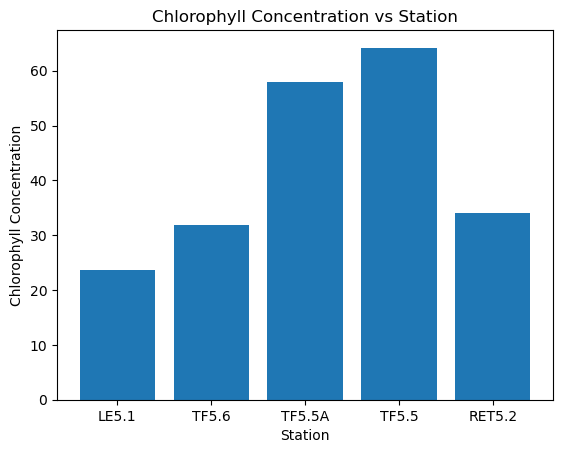

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the bar plot
plt.bar(df_chla['Station'], df_chla['MeasureValue'])

# Set labels for the x and y axes
plt.xlabel('Station')
plt.ylabel('Chlorophyll Concentration')

# Set a title for the plot
plt.title('Chlorophyll Concentration vs Station')

# Display the plot
plt.show()

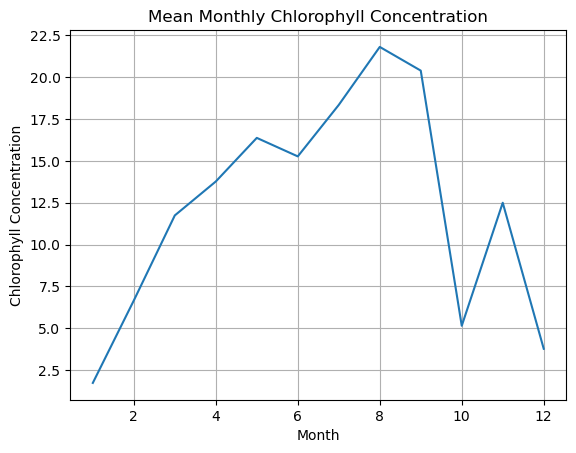

In [6]:
import matplotlib.pyplot as plt

# Convert the 'sampleDate' column to datetime format
df_chla['SampleDate'] = pd.to_datetime(df_chla['SampleDate'])

# Extract the month from the 'sampleDate' column
df_chla['Month'] = df_chla['SampleDate'].dt.month

# Group the data by month and calculate the mean chlorophyll concentration
monthly_mean_chla = df_chla.groupby('Month')['MeasureValue'].mean()

# Create the plot
plt.plot(monthly_mean_chla.index, monthly_mean_chla.values)
plt.xlabel('Month')
plt.ylabel('Chlorophyll Concentration')
plt.title('Mean Monthly Chlorophyll Concentration')
plt.grid(True)

# Display the plot
plt.show()

In [7]:
df_sal = df.copy()
df_sal = df_sal.query("Parameter == 'SALINITY'")
df_sal.head()

,Unnamed: 0,EventId,Station,SampleDate,SampleTime,Depth,SampleType,SampleReplicateType,Parameter,Qualifier,...,coastal_n,blue_n,green_n,red_n,nir08_n,datetime,eo:cloud_cover,proj:epsg,view:sun_azimuth,view:sun_elevation
17,9584,394409,LE5.1,2013-10-01,10:00:00,1,ISM,M1,SALINITY,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.50,32618,153.472907,46.995058
45,9646,394410,LE5.1,2013-11-06,09:55:00,1,ISM,M1,SALINITY,NaN,...,81,81,81,81,81,2013-11-08T15:42:24.810989Z,2.30,32618,161.366555,33.702104
125,9585,394494,TF5.6,2013-10-01,11:30:00,1,ISM,M1,SALINITY,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.50,32618,153.472907,46.995058
180,9587,395010,TF5.6,2014-12-02,11:45:00,1,ISM,M1,SALINITY,NaN,...,0,0,0,0,0,2014-12-04T15:47:01.128737Z,74.51,32618,161.013995,27.860534
209,9590,395009,TF5.6,2014-11-04,12:10:00,1,ISM,M1,SALINITY,NaN,...,0,0,0,0,0,2014-11-02T15:47:02.690711Z,67.42,32618,160.391509,35.431649


In [8]:
df_turb = df.copy()
df_turb = df_turb.query("Parameter == 'TURB_NTU'")
df_turb.head()

,Unnamed: 0,EventId,Station,SampleDate,SampleTime,Depth,SampleType,SampleReplicateType,Parameter,Qualifier,...,coastal_n,blue_n,green_n,red_n,nir08_n,datetime,eo:cloud_cover,proj:epsg,view:sun_azimuth,view:sun_elevation
25,13974,394409,LE5.1,2013-10-01,10:00:00,1,D,S1,TURB_NTU,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.50,32618,153.472907,46.995058
53,13973,394410,LE5.1,2013-11-06,09:55:00,1,D,S1,TURB_NTU,NaN,...,81,81,81,81,81,2013-11-08T15:42:24.810989Z,2.30,32618,161.366555,33.702104
79,13978,394671,TF5.6,2014-01-15,12:30:00,1,D,S1,TURB_NTU,NaN,...,81,81,81,81,81,2014-01-18T15:47:59.659437Z,13.56,32618,155.542397,28.167661
105,13979,394496,TF5.6,2013-12-03,11:50:00,1,D,S1,TURB_NTU,NaN,...,81,81,81,81,81,2013-12-01T15:48:28.292876Z,9.76,32618,161.511960,28.391523
133,13980,394494,TF5.6,2013-10-01,11:30:00,1,D,S1,TURB_NTU,NaN,...,0,0,0,0,0,2013-09-28T15:48:43.124917Z,89.50,32618,153.472907,46.995058


### Correlations

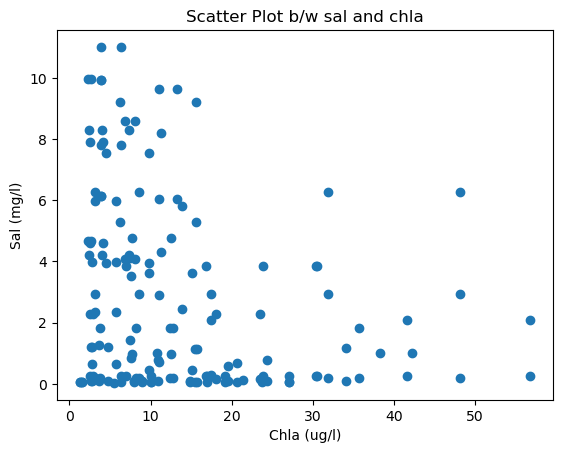

In [9]:
import matplotlib.pyplot as plt

# Convert 'SampleDate' column to datetime data type
df_chla['SampleDate'] = pd.to_datetime(df_chla['SampleDate'])
df_sal['SampleDate'] = pd.to_datetime(df_sal['SampleDate'])

# Merge dataframes along the same date
sal_df = pd.merge(df_chla, df_sal, on='SampleDate')

# Sample data
x = sal_df['MeasureValue_x'] # chla
y = sal_df['MeasureValue_y'] # sal

# Create a scatter plot
plt.scatter(x, y)

# Set labels for the x and y axes
plt.xlabel('Chla (ug/l)')
plt.ylabel('Sal (mg/l)')

# Set a title for the plot
plt.title('Scatter Plot b/w sal and chla')

# Display the plot
plt.show()

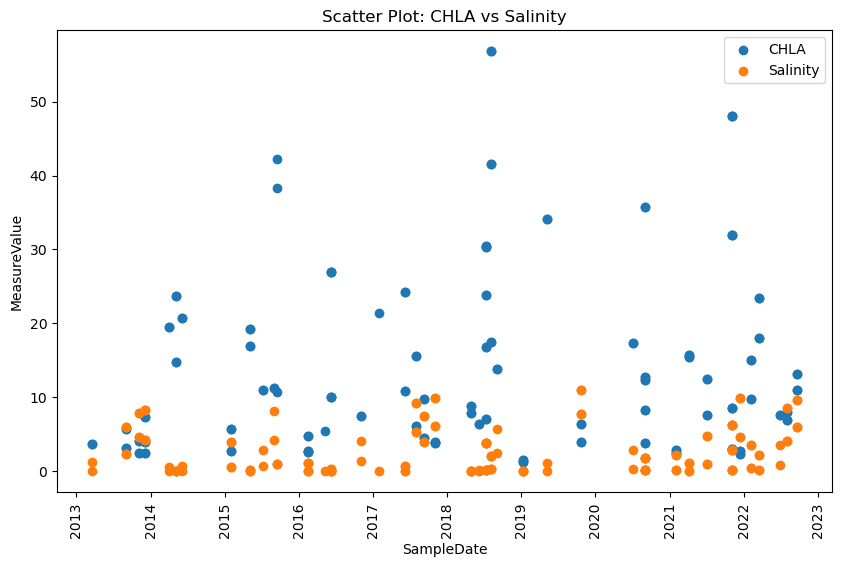

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the scatter plot with larger figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(sal_df['SampleDate'], sal_df['MeasureValue_x'], label='CHLA')
plt.scatter(sal_df['SampleDate'], sal_df['MeasureValue_y'], label='Salinity')

# Set labels for the x and y axes
plt.xlabel('SampleDate')
plt.xticks(rotation=90)
plt.ylabel('MeasureValue')

# Set a title for the plot
plt.title('Scatter Plot: CHLA vs Salinity')

# Add a legend
plt.legend()

# Display the plot
plt.show()


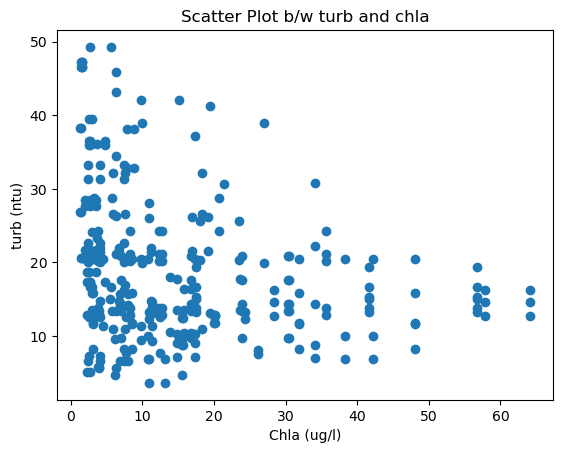

In [11]:
import matplotlib.pyplot as plt

df_turb['SampleDate'] = pd.to_datetime(df_turb['SampleDate'])

# Merge dataframes along the same date
turb_df = pd.merge(df_chla, df_turb, on='SampleDate')

# Sample data
x = turb_df['MeasureValue_x'] # chla
y = turb_df['MeasureValue_y'] # sal

# Create a scatter plot
plt.scatter(x, y)

# Set labels for the x and y axes
plt.xlabel('Chla (ug/l)')
plt.ylabel('turb (ntu)')

# Set a title for the plot
plt.title('Scatter Plot b/w turb and chla')

# Display the plot
plt.show()

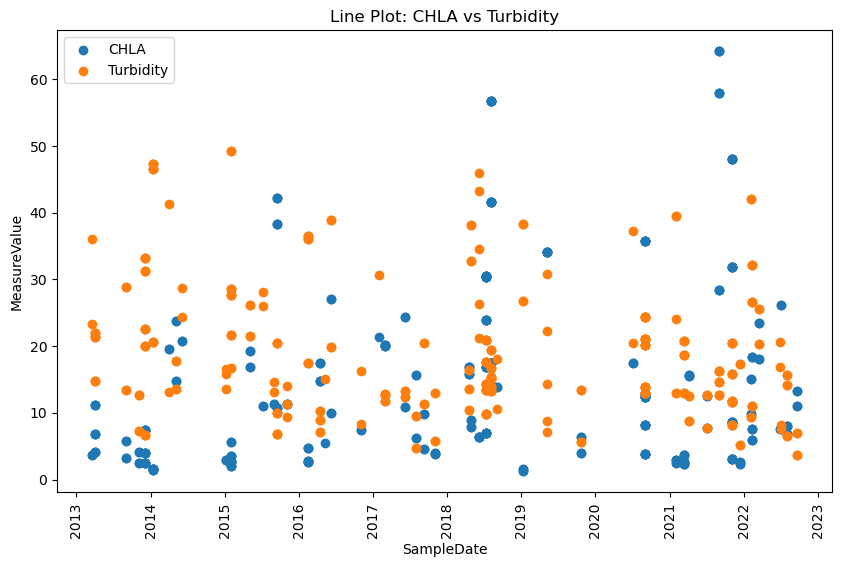

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the line plot with larger figure size
plt.figure(figsize=(10, 6))

# Create the line plot
plt.scatter(turb_df['SampleDate'], turb_df['MeasureValue_x'], label='CHLA')
plt.scatter(turb_df['SampleDate'], turb_df['MeasureValue_y'], label='Turbidity')

# Set labels for the x and y axes
plt.xlabel('SampleDate')
plt.xticks(rotation=90)
plt.ylabel('MeasureValue')

# Set a title for the plot
plt.title('Line Plot: CHLA vs Turbidity')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Normality

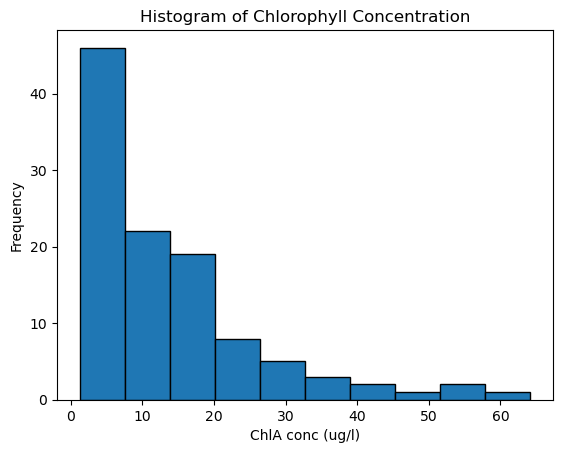

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_chla['log_chla'] = np.log(df_chla['MeasureValue'])

# Create a histogram
plt.hist(df_chla['MeasureValue'], bins=10, edgecolor='black')

# Set labels for the x and y axes
plt.xlabel('ChlA conc (ug/l)')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Histogram of Chlorophyll Concentration')

# Display the plot
plt.show()

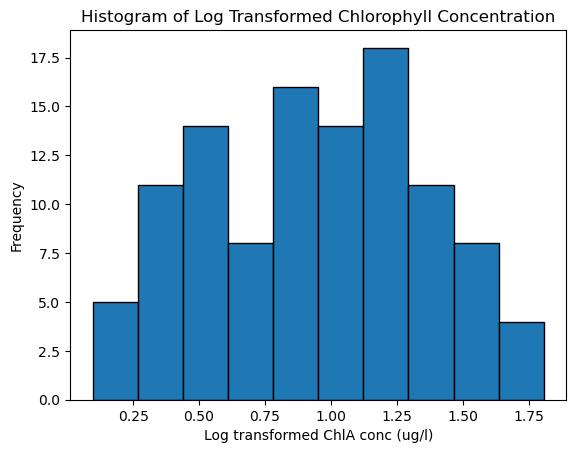

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Remove invalid values (negative values and zeros)
valid_values = df_chla['MeasureValue'].loc[df['MeasureValue'] > 0]

df_chla['log_chla'] = np.log10(valid_values)

# Create a histogram
plt.hist(df_chla['log_chla'], bins=10, edgecolor='black')

# Set labels for the x and y axes
plt.xlabel('Log transformed ChlA conc (ug/l)')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Histogram of Log Transformed Chlorophyll Concentration')

# Display the plot
plt.show()

### Band Ratios 

Bias: -2.281559243266377e-16
Mean Absolute Error (MAE): 9.40436685492352
R-squared: 0.01155260886218945


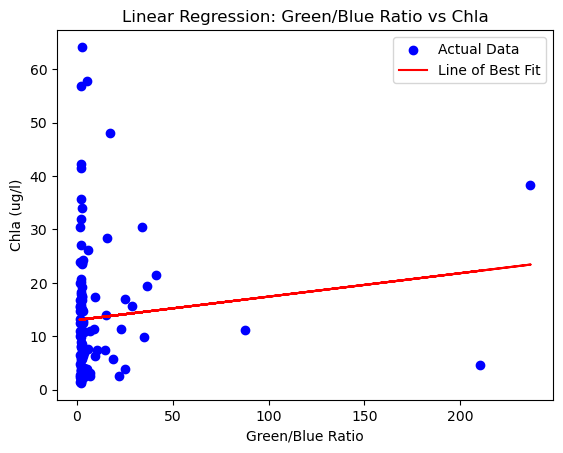

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['coastal']

# Sample data
x = df_chla['ratio']  # b/g ratio
y = df_chla['MeasureValue']  # chla

# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Chla (ug/l)')
plt.xlabel('Green/Blue Ratio')
plt.title('Linear Regression: Green/Blue Ratio vs Chla')
plt.legend()
plt.show()

Bias: -8.148425868808489e-16
Mean Absolute Error (MAE): 9.461071303351204
R-squared: 0.015939774809846097


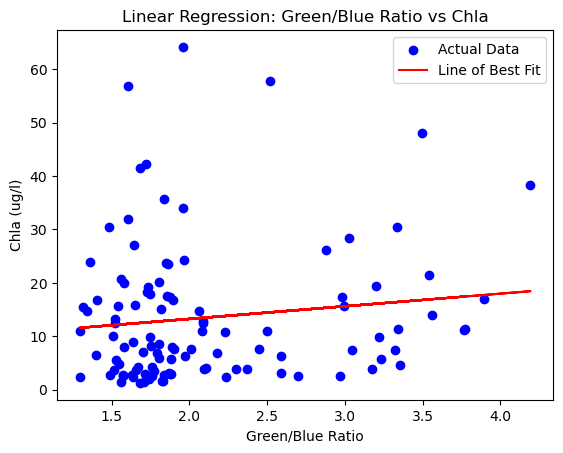

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['blue']

# Sample data
x = df_chla['ratio']  # b/g ratio
y = df_chla['MeasureValue']  # chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Chla (ug/l)')
plt.xlabel('Green/Blue Ratio')
plt.title('Linear Regression: Green/Blue Ratio vs Chla')
plt.legend()
plt.show()

Bias: -2.10229387415259e-15
Mean Absolute Error (MAE): 9.393156551825728
R-squared: 0.008896860296565001


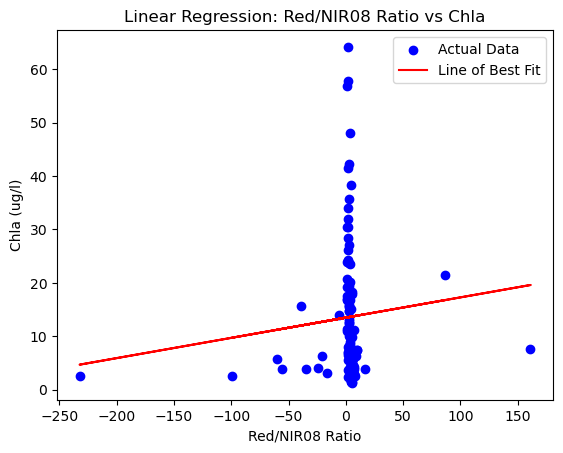

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['red'] / df_chla['nir08']

# Sample data
x = df_chla['ratio']  # g/coas ratio
y = df_chla['MeasureValue']  # chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Chla (ug/l)')
plt.xlabel('Red/NIR08 Ratio')
plt.title('Linear Regression: Red/NIR08 Ratio vs Chla')
plt.legend()
plt.show()

Bias: -9.778111042570187e-17
Mean Absolute Error (MAE): 9.455262787242566
R-squared: 0.0024309670001668726


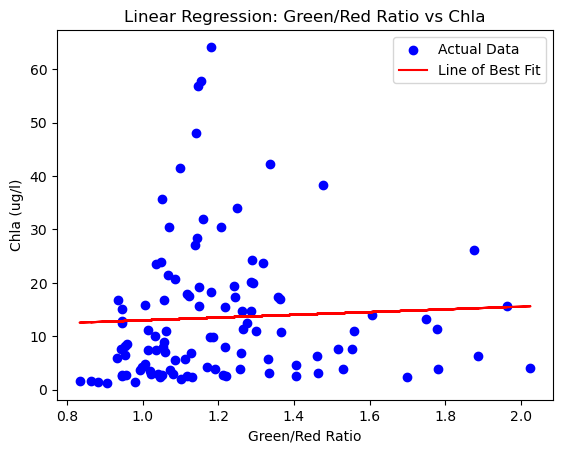

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['red']

# Sample data
x = df_chla['ratio']  # g/red ratio
y = df_chla['MeasureValue']  # chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Chla (ug/l)')
plt.xlabel('Green/Red Ratio')
plt.title('Linear Regression: Green/Red Ratio vs Chla')
plt.legend()
plt.show()

### Log Band Ratios

Bias: -2.301930307938398e-16
Mean Absolute Error (MAE): 0.3453134719369797
R-squared: 0.01162843798889146


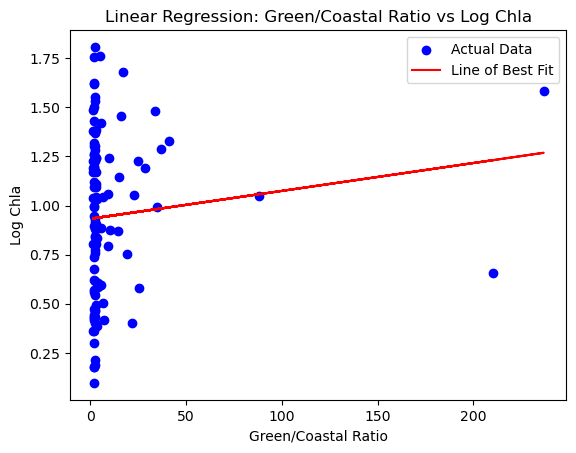

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['coastal']

# Sample data
x = df_chla['ratio']  # g/coas ratio
y = df_chla['log_chla']  # log chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Green/Coastal Ratio')
plt.title('Linear Regression: Green/Coastal Ratio vs Log Chla')
plt.legend()
plt.show()

Bias: -2.363043501954462e-16
Mean Absolute Error (MAE): 0.34267542356509423
R-squared: 0.030167363887053433


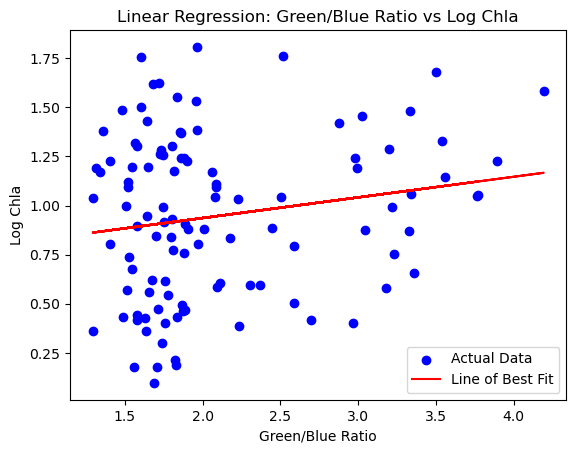

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['blue']

# Sample data
x = df_chla['ratio']  # b/g ratio
y = df_chla['log_chla']  # log chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Green/Blue Ratio')
plt.title('Linear Regression: Green/Blue Ratio vs Log Chla')
plt.legend()
plt.show()

Bias: -2.1898894522422812e-16
Mean Absolute Error (MAE): 0.3423907867920445
R-squared: 0.02245381328911944


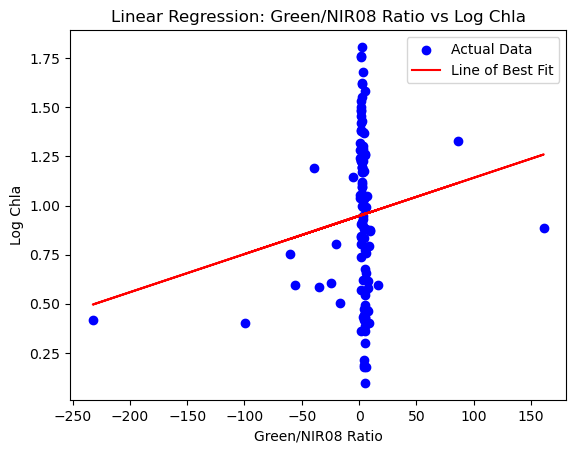

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['red'] / df_chla['nir08']

# Sample data
x = df_chla['ratio']  # g/nir08 ratio
y = df_chla['log_chla']  # log chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Green/NIR08 Ratio')
plt.title('Linear Regression: Green/NIR08 Ratio vs Log Chla')
plt.legend()
plt.show()

Bias: -9.472545072489868e-17
Mean Absolute Error (MAE): 0.3438055059756583
R-squared: 0.017790151922059128


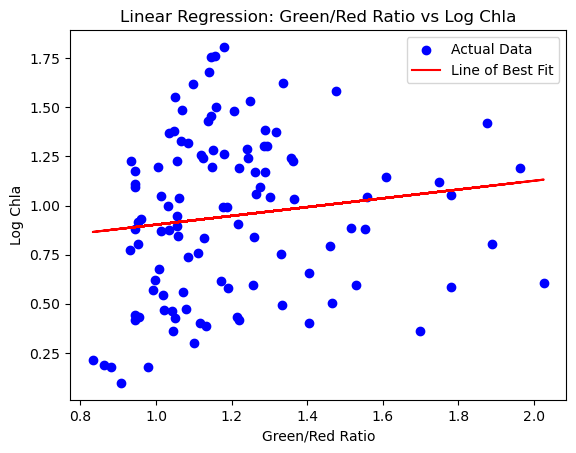

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# green/blue ratio
df_chla['ratio'] = df_chla['green'] / df_chla['red']

# Sample data
x = df_chla['ratio']  # g/red ratio
y = df_chla['log_chla']  # log chla
# Reshape x to 2D
x = x.values.reshape(-1, 1)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(x, y)
# Predict the values
y_pred = model.predict(x)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Green/Red Ratio')
plt.title('Linear Regression: Green/Red Ratio vs Log Chla')
plt.legend()
plt.show()

## CHLA Algorithms

### Algorithm 1

Bias: -2.4791585705849827e-15
Mean Absolute Error (MAE): 0.3353588345884459
R-squared: 0.04998428906226404


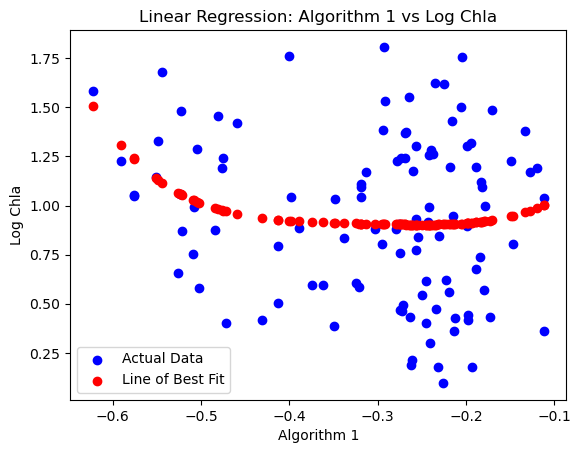

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x = np.log10(df_chla['blue']/df_chla['green'])
X = np.stack([x**0, x**1, x**2, x**3, x**4], axis=1)
y = df_chla['log_chla']  # log chla

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.scatter(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Algorithm 1')
plt.title('Linear Regression: Algorithm 1 vs Log Chla')
plt.legend()
plt.show()

### Algorithm 2

Bias: 3.2593703475233955e-16
Mean Absolute Error (MAE): 0.3386169783053053
R-squared: 0.029060526980048906


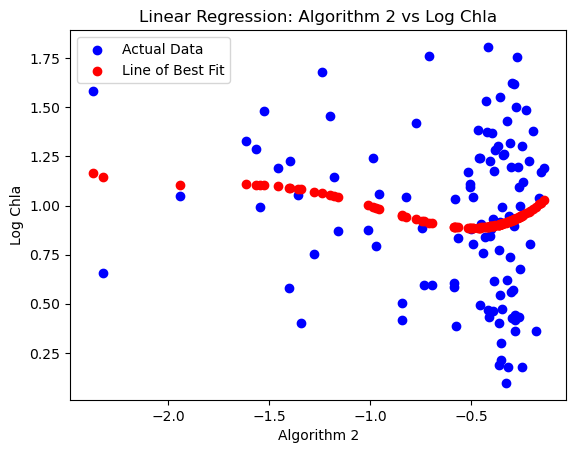

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x = np.log10(df_chla['coastal']/df_chla['green'])
X = np.stack([x**0, x**1, x**2, x**3, x**4], axis=1)
y = df_chla['log_chla']  # log chla

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.scatter(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Algorithm 2')
plt.title('Linear Regression: Algorithm 2 vs Log Chla')
plt.legend()
plt.show()

In [25]:
model.coef_

array([0.        , 1.46910062, 2.26963663, 1.21133177, 0.21646774])

### Algorithm 3

Bias: -2.6278673426907375e-16
Mean Absolute Error (MAE): 0.33656740852659567
R-squared: 0.06712364205953447


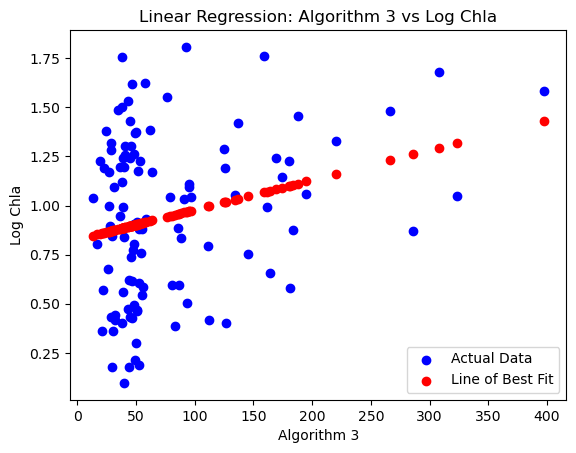

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x = (df_chla['red']/(df_chla['blue'])**2)
X = np.stack([x], axis=1)
y = df_chla['log_chla']  # log chla

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X, y)
# Predict the values
y_pred = model.predict(X)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.scatter(x, y_pred, color='r', label='Line of Best Fit')
plt.ylabel('Log Chla')
plt.xlabel('Algorithm 3')
plt.title('Linear Regression: Algorithm 3 vs Log Chla')
plt.legend()
plt.show()

### Algorithm 4 - same as 3....

Bias: -2.6278673426907375e-16
Mean Absolute Error (MAE): 0.33656740852659567
R-squared: 0.06712364205953447


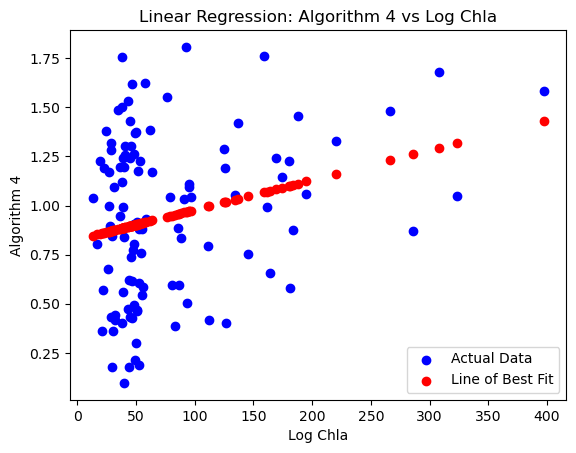

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x = (df_chla['red']/(df_chla['blue'])**2)
X = np.stack([x], axis=1)
y = df_chla['log_chla']  # log chla

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X, y)
# Predict the values
y_pred = model.predict(X)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.scatter(x, y_pred, color='r', label='Line of Best Fit')
plt.xlabel('Log Chla')
plt.ylabel('Algorithm 4')
plt.title('Linear Regression: Algorithm 4 vs Log Chla')
plt.legend()
plt.show()

### Algorithm 5

Bias: -1.2935626066733474e-16
Mean Absolute Error (MAE): 0.3317369425726006
R-squared: 0.1173376208126874


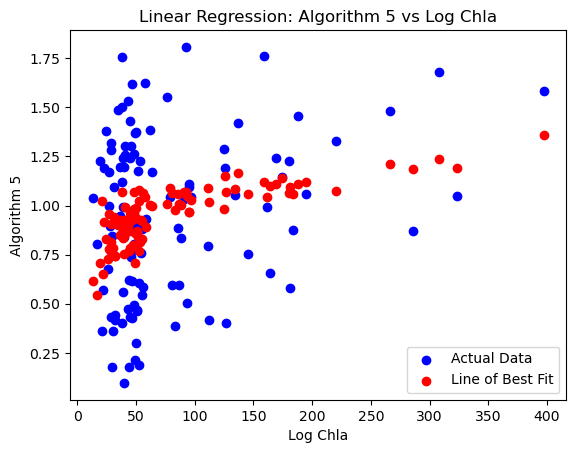

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x = (df_chla['red']/(df_chla['blue'])**2)
X = np.stack([df_chla['red'], x], axis=1)
y = df_chla['log_chla']  # log chla

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X, y)
# Predict the values
y_pred = model.predict(X)

# Calculate bias
bias = np.mean(y - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

# Plot the line of best fit
plt.scatter(x, y, color='b', label='Actual Data')
plt.scatter(x, y_pred, color='r', label='Line of Best Fit')
plt.xlabel('Log Chla')
plt.ylabel('Algorithm 5')
plt.title('Linear Regression: Algorithm 5 vs Log Chla')
plt.legend()
plt.show()

Bias: -0.08830595248199256
Mean Absolute Error (MAE): 0.39685751535290065
R-squared: 0.05049534684443513


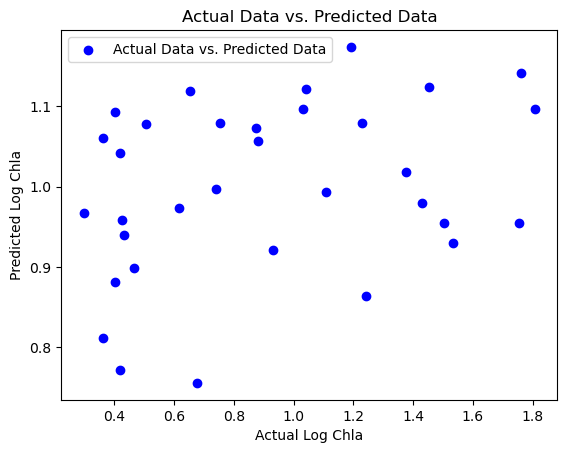

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

x = (df_chla['red']/(df_chla['blue'])**2)
X = np.stack([df_chla['red'], x], axis=1)
y = df_chla['log_chla']  # log chla

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize linear regression model
model = LinearRegression()
# Fit the regression model
model.fit(X_train, y_train)
# Predict the values
y_pred = model.predict(X_test)

# Calculate bias
bias = np.mean(y_test - y_pred)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Plot the scatter plot
plt.scatter(y_test, y_pred, color='b', label='Actual Data vs. Predicted Data')
plt.xlabel('Actual Log Chla')
plt.ylabel('Predicted Log Chla')
plt.title('Actual Data vs. Predicted Data')
plt.legend()
plt.show()

In [30]:
df_chla['blue'].min()

0.0071503703703703

In [31]:
df_chla['blue'].max()

0.091415411392405

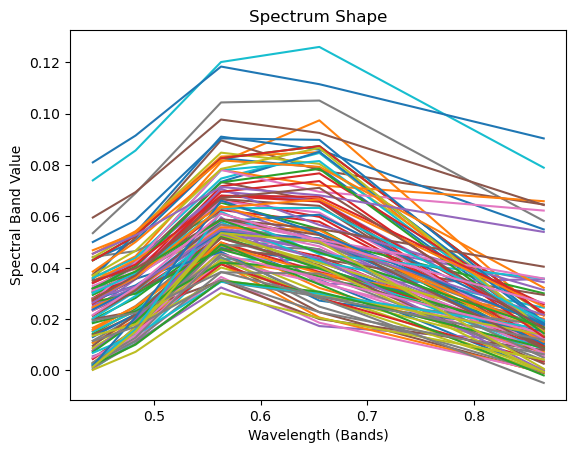

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Band1', 'Band2', 'Band3', 'Band4', and 'Band5'

# Get the spectral band values from the DataFrame
spectral_bands = df_chla[['coastal', 'blue', 'green', 'red', 'nir08']].values

# Generate x-axis values (band indices)
x = [0.443, 0.483, 0.563, 0.655, 0.865]

# Create the line plot
plt.plot(x, spectral_bands.T)

# Set labels for the x and y axes
plt.xlabel('Wavelength (Bands)')
plt.ylabel('Spectral Band Value')

# Set a title for the plot
plt.title('Spectrum Shape')

# Display the plot
plt.show()

### PCA Algorithm

In [33]:
!pip install mlxtend

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Define the features X and the target variable y
ref = np.stack([df_chla['coastal'], df_chla['blue'], df_chla['green'],
             df_chla['red'], df_chla['nir08']], axis=1)
y = df_chla['log_chla']

# Perform PCA on the ref variable
pca = PCA()
ref_pca = pca.fit_transform(ref)
scores = ref_pca[:]  
X = np.hstack((scores, scores**2))

# Add a constant column to X for the intercept term
X = sm.add_constant(X)

# Perform stepwise feature selection
inmodel = []
while True:
    remaining = list(set(range(X.shape[1])) - set(inmodel))
    if len(remaining) == 0:
        break
    best_aic = np.inf
    best_feature = None
    for feature in remaining:
        model = sm.OLS(y, X[:, inmodel + [feature]])
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_feature = feature
    if best_feature is not None:
        inmodel.append(best_feature)

# Fit the final OLS model using the selected features
final_X = X[:, inmodel]
final_model = sm.OLS(y, final_X)
final_results = final_model.fit()

# Get the model coefficients
b = final_results.params

# Get the standard errors
se = final_results.bse

# Get the p-values
pval = final_results.pvalues

# Print the results
print("Model Coefficients:")
print(b)
print("\nStandard Errors:")
print(se)
print("\nP-values:")
print(pval)

Model Coefficients:
const        1.131148
x1          29.490711
x2         212.504615
x3        -647.420613
x4      -86238.155818
x5          -7.045682
x6         -13.222234
x7          -8.294577
x8        -852.638366
x9         -46.625499
x10         -0.052314
dtype: float64

Standard Errors:
const        0.051203
x1           2.737317
x2          34.473291
x3         190.942207
x4       23159.368717
x5           3.405636
x6          13.073944
x7           7.225189
x8        1642.689722
x9         254.954456
x10          1.079363
dtype: float64

P-values:
const    7.687872e-40
x1       2.554930e-18
x2       1.578965e-08
x3       1.006301e-03
x4       3.279982e-04
x5       4.119474e-02
x6       3.143431e-01
x7       2.537597e-01
x8       6.048960e-01
x9       8.552717e-01
x10      9.614420e-01
dtype: float64


In [35]:
YHat = final_results.predict(final_X)
print(YHat)

[0.44376511 0.48411824 1.03840716 0.76949721 0.89401557 0.85184237
 0.84160027 0.45574894 1.18257491 1.18257491 0.44601099 1.27083838
 1.46434413 0.98620456 1.4884657  0.39497046 1.1457741  1.16473949
 1.18786878 1.08697913 1.06847898 0.80830829 1.08246604 1.05784297
 1.17230141 1.48836941 0.77624308 1.06851734 0.82663544 0.72856583
 0.76089551 1.02649785 0.77749858 0.80812407 1.18533912 1.21693004
 0.89501148 0.71668861 0.52943068 1.12558663 0.48686941 0.25399397
 0.34326833 0.34326833 1.13556334 0.82190526 1.33157806 0.94024673
 0.70778408 1.25860734 0.97596337 1.39137948 1.29213151 0.62426927
 0.94964818 0.55773838 0.60981272 1.04801516 1.12593549 0.61383276
 0.65114119 1.27551005 1.29301307 0.53121471 0.69320294 0.65758759
 0.79523209 1.01944945 0.74322839 0.31454262 0.88292954 0.93356706
 0.64805378 1.00117689 0.77907108 1.2815557  1.36054169 1.32499165
 1.3700466  1.35958211 0.9090773  0.57929379 1.3321556  0.93240956
 1.37054455 0.65205631 1.46224035 1.36559413 1.3594612  1.3522

In [36]:
# Calculate bias
bias = np.mean(y - Yhat)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, Yhat)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y, Yhat)
print(f'R-squared: {r2}')

NameError: name 'Yhat' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y, Yhat, color='b', label='Actual vs Predicted')
plt.plot(y, y, color='r', linestyle='--', label='Ideal')
plt.xlabel('Actual Chl')
plt.ylabel('Predicted Chl')
plt.title('Actual vs Predicted Chl')
# Add R-squared and MAE as text annotations
# Add R-squared and MAE as text annotations
plt.text(0.95, 0.05, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom')
plt.text(0.95, 0.1, f'MAE: {mae:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom')
plt.legend()
plt.show()

### Linear Regression

[[-3.57577474e-02 -6.68539292e-03 -6.48526536e-03  5.63824596e-03
  -1.28649083e-03]
 [ 4.68642595e-02 -1.97698302e-02 -1.24148996e-02 -7.67756305e-03
   1.01429322e-03]
 [-1.61575611e-02 -4.40823975e-03 -3.46246786e-03 -1.97264462e-04
   1.34433767e-04]
 [ 6.21196204e-03 -8.01530678e-03  3.52915641e-03  5.03344686e-05
  -2.43976155e-04]
 [-5.85517130e-03 -5.76664738e-03  5.05727503e-03 -1.29033459e-03
  -8.13251637e-05]
 [-3.97103608e-02 -1.80195693e-03  1.14921852e-02  5.42293609e-03
  -2.08700636e-04]
 [-3.35374418e-02 -2.83473939e-03 -1.00336200e-02  4.18309026e-04
  -8.69607562e-04]
 [ 9.27227209e-02  5.35301901e-03 -6.62671856e-03  2.53940316e-03
  -1.89849114e-03]
 [-1.27139022e-02  3.16982690e-03 -5.74103369e-03 -7.71668268e-03
  -3.54693953e-04]
 [-1.27139022e-02  3.16982690e-03 -5.74103369e-03 -7.71668268e-03
  -3.54693953e-04]
 [ 4.06301068e-02 -1.75675010e-02  4.47813929e-03  3.47839557e-03
   1.40430095e-03]
 [-3.11713043e-02  1.19175363e-02 -1.07598087e-02 -3.85262269e-03

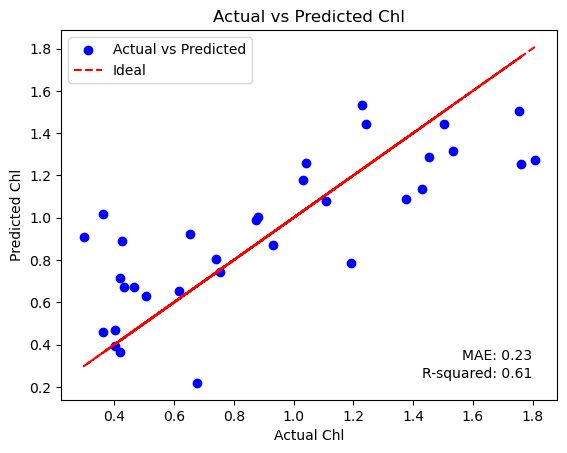

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

# Define the features X and the target variable y
ref = np.stack([df_chla['coastal'], df_chla['blue'], df_chla['green'],
             df_chla['red'], df_chla['nir08']], axis=1)
y = df_chla['log_chla']

# Perform PCA on the ref variable
pca = PCA()
ref_pca = pca.fit_transform(ref)
scores = ref_pca[:]  
print(scores)
X = np.hstack((scores, scores**2))

# Add a constant column to X for the intercept term
X = sm.add_constant(X)

# Perform stepwise feature selection
inmodel = []
while True:
    remaining = list(set(range(X.shape[1])) - set(inmodel))
    if len(remaining) == 0:
        break
    best_aic = np.inf
    best_feature = None
    for feature in remaining:
        model = sm.OLS(y, X[:, inmodel + [feature]])
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_feature = feature
    if best_feature is not None:
        inmodel.append(best_feature)

# Fit the final OLS model using the selected features
final_X = X[:, inmodel]
final_model = sm.OLS(y, final_X)
final_results = final_model.fit()

# Get the model coefficients
b = final_results.params

# Get the standard errors
se = final_results.bse

# Get the p-values
pval = final_results.pvalues

# Print the results
print("Model Coefficients:")
print(b)
print("\nStandard Errors:")
print(se)
print("\nP-values:")
print(pval)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.3, random_state=42)

# Perform linear regression on the training set
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get the coefficients, residuals, and predicted values on the test set
b = results.params
r = results.resid
Yhat = X_test.dot(b)

# Calculate bias
bias = np.mean(y_test - Yhat)
print(f'Bias: {bias}')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, Yhat)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r2 = r2_score(y_test, Yhat)
print(f'R-squared: {r2}')

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, Yhat, color='b', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='r', linestyle='--', label='Ideal')
plt.xlabel('Actual Chl')
plt.ylabel('Predicted Chl')
plt.title('Actual vs Predicted Chl')
# Add R-squared and MAE as text annotations
plt.text(0.95, 0.05, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom')
plt.text(0.95, 0.1, f'MAE: {mae:.2f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom')
plt.legend()
plt.show()
